# Brownian Motion

[File as PDF](https://github.com/fcichos/CBPM24/blob/7bbed8e18b859cef508e5b763a58b21aef6f7fe4/source/notebooks/L4/2_brownian_motion.pdf)

We will use our newly gained knowledge about classes for the simulation of Brownian motion. This actually perfectly fits to the object oriented programming topic, as each Brownian particle (or colloid) can be seen as an object instanciated from the same class, but perhaps with different properties. Some particles might be larger and some smaller for example. We know already some part of that, as we have covered it in earlier lectures.

In [18]:
# include the required modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 10,
                     'lines.linewidth': 1,
                     'lines.markersize': 5,
                     'axes.labelsize': 10,
                     'xtick.labelsize' : 9,
                     'ytick.labelsize' : 9,
                     'legend.fontsize' : 8,
                     'contour.linewidth' : 1,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (4, 3),
                     'figure.dpi': 150 }) 

def get_size(w,h):
    return((w/2.54,h/2.54))

## Physics 

The Brownian motion of a colloidal particle (called solute) results from the collisions with the surrounding solvent molecules. Due to these collisions, the particle has in equilibrium a mean kinetic energy defined by the temperature. With this kinetic energy it would travel a mean distance $l$ before it takes another random direction and go another step length $l$. This mean distance the particle travels is very short in liquids. It is on the other of picometers. It has been shown by **Lindenberg and Lévy** that a sequence of many such infinitesimal small random steps leads to a total effect, which can be approximated by a normal distribution. This important theorem is called the **central limit theorem** (see the lecture on random numbers).

For our Brownian motion the sequence of tiny steps leads after a time $t$ to the following probability distribution to find the particle at a position $x$ if it initially started at $x=0$:

\begin{equation}
p(x,\Delta t)=\frac{1}{\sqrt{4\pi D \Delta t}}e^{-\frac{x^2}{4D \Delta t}}
\end{equation}

where $D$ is the diffusion coefficient. Thus each step of our Brownian motion simulation for a timestep of $\Delta t$ is taken from a Gaussian distribution with a varaince of $\sigma^2=2D \Delta t$. 



For our simulation that means that we can draw numbers from a normal distribution with `np.random.normal` with the standard deviation $\sigma=\sqrt{2D \Delta t}$ as a parameter. This has to be done for the x-coordinate and the y-coordinate.

The code for our Brownian motion therefore is

~~~
sigma=np.sqrt(2*D*dt)
dx,dy=[(np.random.normal(0.0, sigma),np.random.normal(0.0, sigma)] 
x=x+dx
y=y+dy
~~~

which gives a whole 2d trajectory. With the help of this, we would like to write a colloidal particle class. So lets make a plan how this could work out. 

## Class Planning

<div class="alert alert-info">

**Physics project** Colloidal particle class
   
We will define a class for a colloidal particle, which we may use later for our projects as well. This makes sense, as we can have different colloidal particles of different radius for example, which do start to carry out Brownian motion from different positions. A colloidal particle is and object, which has properties very much in the same way as classes intend that. The whole definition requires some planning, especially on what the class should keep track of and what the object.
    
The particle class shall keep track of 
    
    * the total number of colloidal particles
    * the value of k_B T/(6 pi eta) = 2.2e-19 
    
The class shall provide the class specific methods
    
    * how_many() which returns the total number of colloids
    * __str__ which returns a string with radius and position of the particle

</div>

<div class="alert alert-info">

**Physics interlude:** Colloidal particle class


    
Each object shall then contain the following properties
    
    * the particle radius, R
    * a list of all x position, x
    * a list of all y position, y
    * the index of the colloid, index
    * the diffusion coefficient given by k_B T/(6 pi eta R), D
    
The object shall provide the following methods
    
    * sim_trajectory() simulate a whole trajectory at once
    * update(dt) do one step of Brownian motion with a time step dt as argument, return the current position
    * get_trajectory() return the trajectory as a pandas DataFrame with the columns x and y
    * get_D() return the diffusion coefficient
    
</div>

In [19]:
# Class definition
class Colloid:

    # A class variable, counting the number of Colloids
    number = 0
    f = 2.2e-19 # this is k_B T/(6 pi eta) in m^3/s

    # constructor
    def __init__(self,R, x0=0, y0=0):        
        # add initialisation code here
        self.R=R        
        self.x=[x0]
        self.y=[y0]
        Colloid.number=Colloid.number+1
        self.index=Colloid.number 
        self.D=Colloid.f/self.R        
    
    def get_D(self):        
        return(self.D)
    
    def sim_trajectory(self,N,dt):        
        for i in range(N):
            self.update(dt)
    
    def update(self,dt):                   
        self.x.append(self.x[-1]+np.random.normal(0.0, np.sqrt(2*self.D*dt)))
        self.y.append(self.y[-1]+np.random.normal(0.0, np.sqrt(2*self.D*dt)))
        return(self.x[-1],self.y[-1])
        
    def get_trajectory(self):
        return(pd.DataFrame({'x':self.x,'y':self.y}))
    
    # class method accessing a class variable
    @classmethod
    def how_many(cls):
        return(Colloid.number)
    
    # insert something that prints the particle position in a formatted way when printing
    def __str__(self):
        return("I'm a particle with radius R={0:0.3e} at x={1:0.3e},y={2:0.3e}.".format(self.R, self.x[-1], self.y[-1]))

<div class="alert alert-info">

**Note:**
   
Note that the function `sim_trajectory` is actually calling the function `update` of the same object to generate the whole trajectory at once.
    
</div>

## Simulating

With the help of this Colloid class, we would like to carry out simulations of Brownian motion of multiple particles. The simulations shall

* take n=200 particles
* have N=200 trajectory points each
* start all at 0,0
* particle objects should be stored in a list p_list


In [20]:
N=400 # the number of trajectory points
n=200 # the number of particles

p_list=[]
dt=0.05

# creating all objects 
for i in range(n):
    p_list.append(Colloid(1e-6))


for (index,p) in enumerate(p_list):
    p.sim_trajectory(N,dt)

In [21]:
print(p_list[100])

I'm a particle with radius R=1.000e-06 at x=-2.123e-07,y=-3.300e-06.


## Plotting the trajectories

The next step is to plot all the trajectories.

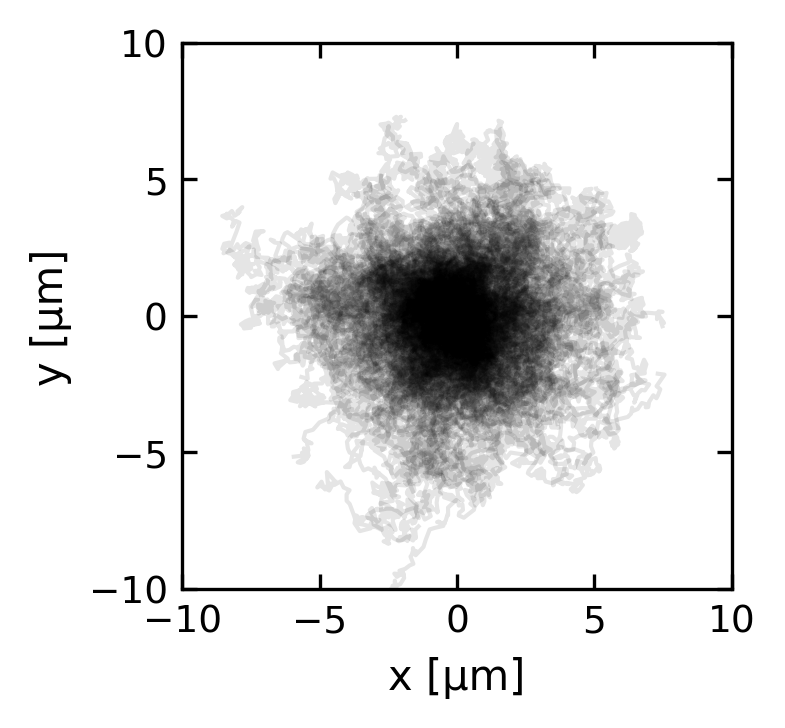

In [22]:
# we take real world diffusion coefficients so scale up the data to avoid nasty exponentials 
scale=1e6

plt.figure(figsize=get_size(6,6))

[plt.plot(np.array(p.x[:])*scale,np.array(p.y[:])*scale,'k-',alpha=0.1,lw=1) for p in p_list]
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
plt.show()

## Characterizing the Brownian motion

Now that we have a number of trajectories, we can analyze the motion of our Brownian particles. 

### Calculate the particle speed

One way is to calculate its speed by measuring how far it traveled within a certain time $n\, dt$, where $dt$ is the timestep of out simulation. We can do that as 

\begin{equation}
v(n dt) = \frac{<\sqrt{(x_{i+n}-x_{i})^2+(y_{i+n}-y_{i})^2}>}{n\,dt}
\end{equation}


The angular brackets on the top take care of the fact that we can measure the distance traveled within a certain time $n\, dt$ several times along a trajectory. 

![msd](img/msd.png)

These values can be used to calculate a mean speed. Note that there is not an equal amount of data pairs for all separations available. For $n=1$ there are 5 distances available. For $n=5$, however, only 1. This changes the statistical accuracy of the mean.

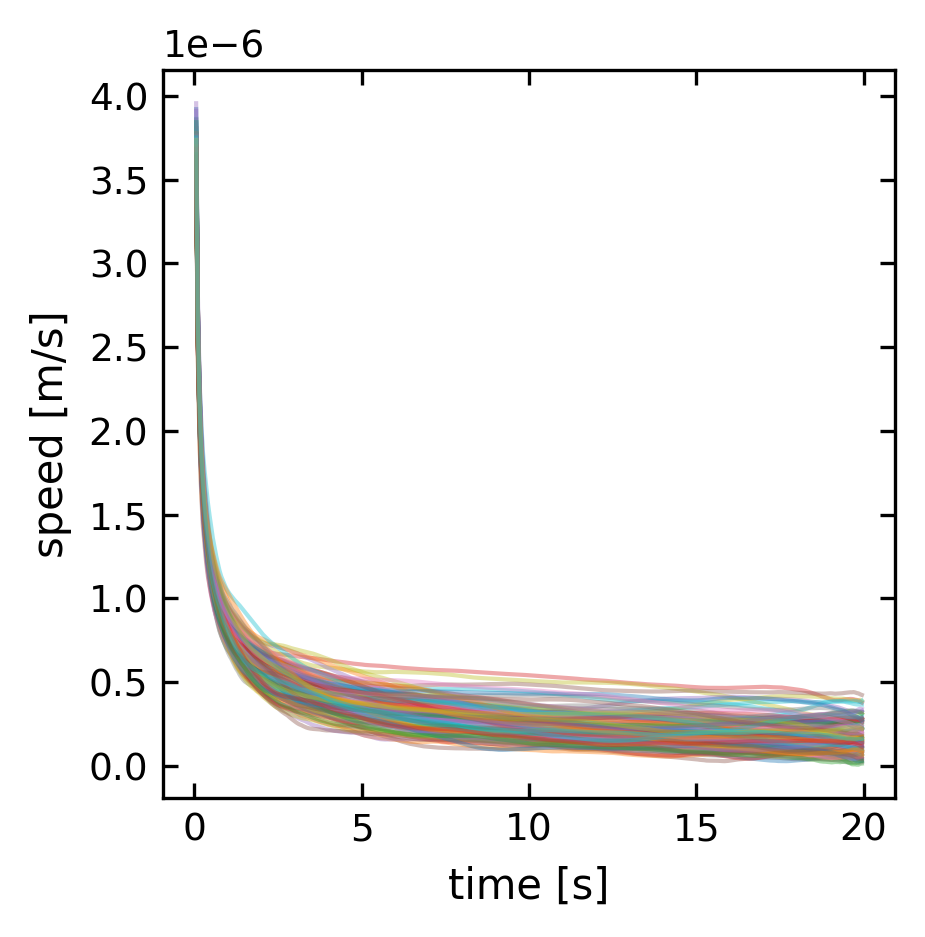

In [23]:
time=np.array(range(1,N))*dt

plt.figure(figsize=get_size(8,8))

for j in range(100):
    t=p_list[j].get_trajectory()
    md=[np.mean(np.sqrt(t.x.diff(i)**2+t.y.diff(i)**2)) for i in range(1,N)]
    md=md/time
    plt.plot(time,md,alpha=0.4)

plt.ylabel('speed [m/s]')
plt.xlabel('time [s]')    
plt.show()   

The result of this analysis shows, that each particle has an apparent speed which seems to increase with decreasing time of observation or which decreases with increasing time. This would mean that there is some friction at work, which slows down the particle in time, but this is apparently not true. Also an infinite speed at zero time appears to be unphysical. 
The correct answer is just that the speed is no good measure to characterize the motion of a Brownian particle. 

### Calculate the particle mean squared displacement

A better way to characterize the motion of a Brownian particle is the mean squared displacement, as we have already mentioned it in previous lectures. We may compare our simulation now to the theoretical prediction, which is 

\begin{equation}
\langle \Delta r^{2}(t)\rangle=2 d D t
\end{equation}

where $d$ is the dimension of the random walk, which is $d=2$ in our case. 

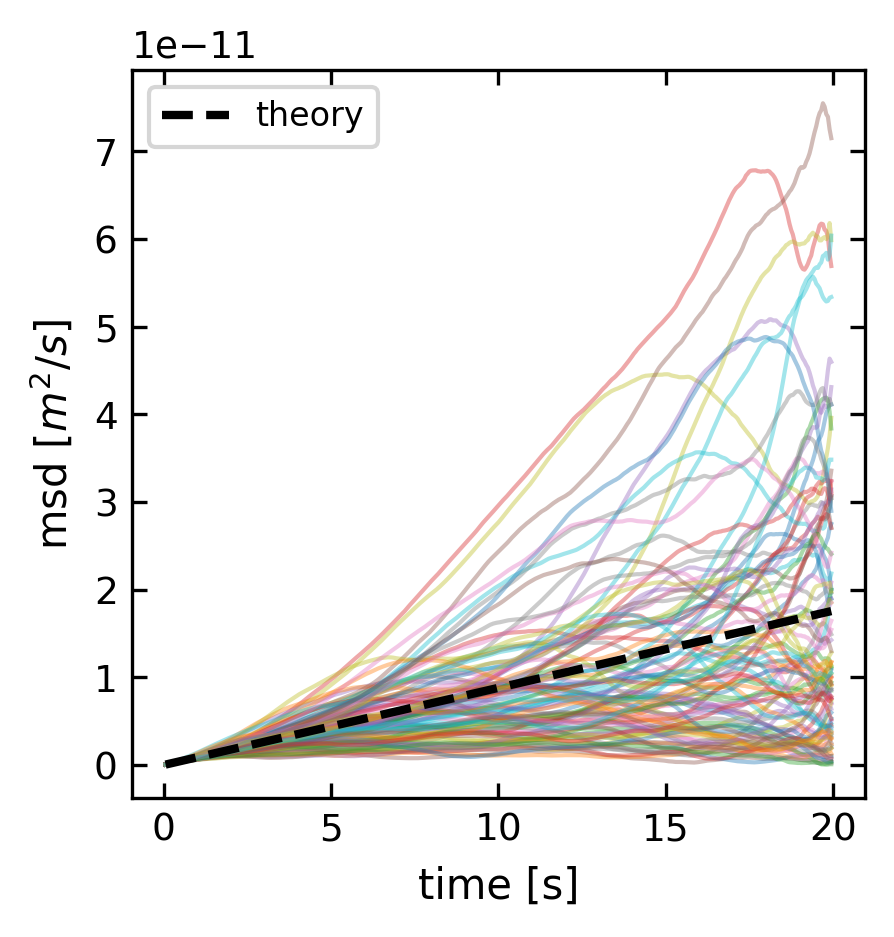

In [24]:
time=np.array(range(1,N))*dt

plt.figure(figsize=get_size(8,8))

for j in range(100):
    t=p_list[j].get_trajectory()
    msd=[np.mean(t.x.diff(i).dropna()**2+t.y.diff(i).dropna()**2) for i in range(1,N)]
    plt.plot(time,msd,alpha=0.4)

plt.plot(time, 4*p_list[0].D*time,'k--',lw=2,label='theory')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('msd $[m^2/s]$')
plt.show()   

The results show that the mean squared displacement of the individual particles follows *on average* the theoretical predictions of a linear growth in time. That means, we are able to read the diffusion coefficient from the slope of the MSD of the individual particles if recorded in a simulation or an experiment.

Yet, each individual MSD is deviating strongly from the theoretical prediction especially at large times. This is due to the fact mentioned earlier that our simulation (or experimental) data only has a limited number of data points, while the theoretical prediction is made for the limit of infinite data points. 

<div class="alert alert-warning">

**Warning:** Analysis of MSD data
   
Single particle tracking, either in the experiment or in numerical simulations can therefore only deliver an estimate of the diffusion coefficient and care should be taken when using the whole MSD to obtain the diffusion coefficient. One typically uses only a short fraction of the whole MSD data at short times.
    
</div>